# Recommendation System I

In [4]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import pymongo
import math
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [5]:
%matplotlib notebook

## Get revisions and synopsis

In [6]:
#Connections with mongoDB collections
client = pymongo.MongoClient("mongodb://localhost:27017/")
mi_db = client["books"]

revsColec = mi_db["reviews"]
revsMetaColec = mi_db["revsmetadata"]
booksMetaColec = mi_db["booksmetadata"]

In [7]:
#Load revisions into DataFrame
revsMetaDF = pd.DataFrame(revsMetaColec.find())
emoDict = revsMetaDF['revEmo'].values
emoList = emoDict.tolist()
emoDF = pd.DataFrame(emoList)
emoAvgDF = emoDF.div(emoDF.sum(axis=1), axis=0).fillna(0)
revsMetaDF = pd.concat([revsMetaDF.loc[:, revsMetaDF.columns != 'revEmo'], emoAvgDF], axis = 1).sort_values(['userID', 'bookID'])
revsMetaDF[1000:].head(20)

,_id,userID,bookID,revSent,revSubj,anger,anticipation,disgust,fear,joy,negative,positive,sadness,surprise,trust
3167,3255625484,108669162,40097951,-0.120000,0.690000,0.000000,0.250000,0.000000,0.000000,0.000000,0.000000,0.500000,0.000000,0.000000,0.250000
1624,3253969799,108694143,505352,0.066667,0.258333,0.000000,0.250000,0.000000,0.000000,0.250000,0.000000,0.250000,0.000000,0.000000,0.250000
11011,3267755142,108709160,25778020,0.381481,0.629630,0.000000,0.000000,0.000000,0.000000,0.200000,0.000000,0.400000,0.000000,0.200000,0.200000
4594,3257605632,108721786,25893783,0.350000,0.416667,0.000000,0.500000,0.000000,0.000000,0.000000,0.000000,0.500000,0.000000,0.000000,0.000000
9594,3266099689,108721786,3217221,0.000000,0.000000,0.000000,0.250000,0.000000,0.000000,0.250000,0.000000,0.250000,0.000000,0.000000,0.250000
4566,3257592341,108721786,36505654,0.162500,0.541518,0.000000,0.333333,0.000000,0.000000,0.000000,0.222222,0.222222,0.000000,0.111111,0.111111
10965,3267722660,108721786,41542761,0.000000,0.000000,0.000000,0.250000,0.000000,0.000000,0.250000,0.000000,0.250000,0.000000,0.000000,0.250000
2121,3254277534,10872826,28965131,-0.137500,0.679167,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2229,3254358995,10872826,36669643,0.225000,0.600000,0.083333,0.083333,0.083333,0.083333,0.083333,0.166667,0.083333,0.083333,0.083333,0.166667
5658,3259369432,108745557,34826741,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [8]:
#Load synopsis into DataFrame
booksMetaDF = pd.DataFrame(booksMetaColec.find())
emoDict = booksMetaDF['descrEmo'].values
emoList = emoDict.tolist()
emoDF = pd.DataFrame(emoList)
emoAvgDF = emoDF.div(emoDF.sum(axis=1), axis=0).fillna(0)
booksMetaDF = pd.concat([booksMetaDF.loc[:, booksMetaDF.columns != 'descrEmo'], emoAvgDF], axis = 1).sort_values('_id')
booksMetaDF

,_id,descrSent,descrSubj,anger,anticipation,disgust,fear,joy,negative,positive,sadness,surprise,trust
5161,1,0.016425,0.677778,0.112000,0.072000,0.064000,0.088000,0.024000,0.216000,0.136000,0.136000,0.064000,0.088000
924,1001506,-0.125000,0.375000,0.066667,0.066667,0.066667,0.066667,0.133333,0.066667,0.200000,0.066667,0.066667,0.200000
5327,1002520,0.300000,1.000000,0.133333,0.100000,0.033333,0.133333,0.066667,0.133333,0.100000,0.133333,0.000000,0.166667
2599,10032454,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5277,1003759,0.218750,0.631250,0.000000,0.111111,0.055556,0.055556,0.166667,0.111111,0.277778,0.000000,0.055556,0.166667
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3310,99298,0.158709,0.642732,0.141176,0.105882,0.035294,0.035294,0.070588,0.176471,0.152941,0.117647,0.094118,0.070588
5922,9952500,0.483333,0.516667,0.000000,0.090909,0.000000,0.000000,0.090909,0.272727,0.272727,0.000000,0.000000,0.272727
7613,9961796,0.168677,0.538307,0.046512,0.186047,0.093023,0.046512,0.139535,0.046512,0.255814,0.023256,0.069767,0.093023
1350,9969571,-0.051190,0.540476,0.025000,0.175000,0.025000,0.050000,0.100000,0.200000,0.200000,0.050000,0.050000,0.125000


## Get emotions from some user's reviews

In [11]:
#Get emotions from a given user's history
def getUserEmo(userID, user):
    userDF = revsMetaDF.loc[revsMetaDF['userID']==userID]
    userDFemotions =userDF[['bookID','anger','disgust','sadness','surprise','fear','trust',
                            'joy','anticipation','negative','positive', 'revSent']]
    userDFemotions.index = userDFemotions['bookID']
    userDFemotions = userDFemotions.drop(['bookID'], axis = 1)
    print(userDFemotions)
    for item in revsColec.find({'userID': userID}, {'userName': 1, 'bookTile': 1}):
        print(item['userName'], item['bookTile'])
    userDFemotions.T.plot(fontsize=11, figsize=(8, 6), grid = True, kind = 'barh')

             anger   disgust   sadness  surprise      fear     trust  \
bookID                                                                 
48898288  0.105263  0.105263  0.052632  0.052632  0.105263  0.157895   
51838595  0.066667  0.066667  0.066667  0.000000  0.066667  0.200000   
52849485  0.058824  0.058824  0.176471  0.000000  0.176471  0.117647   

               joy  anticipation  negative  positive   revSent  
bookID                                                          
48898288  0.105263      0.000000  0.052632  0.263158  0.175255  
51838595  0.133333      0.066667  0.000000  0.333333  0.455000  
52849485  0.058824      0.058824  0.117647  0.176471  0.208333  
Miss The Sleepover
Miss Lockdown
Miss The Heatwave


<IPython.core.display.Javascript object>


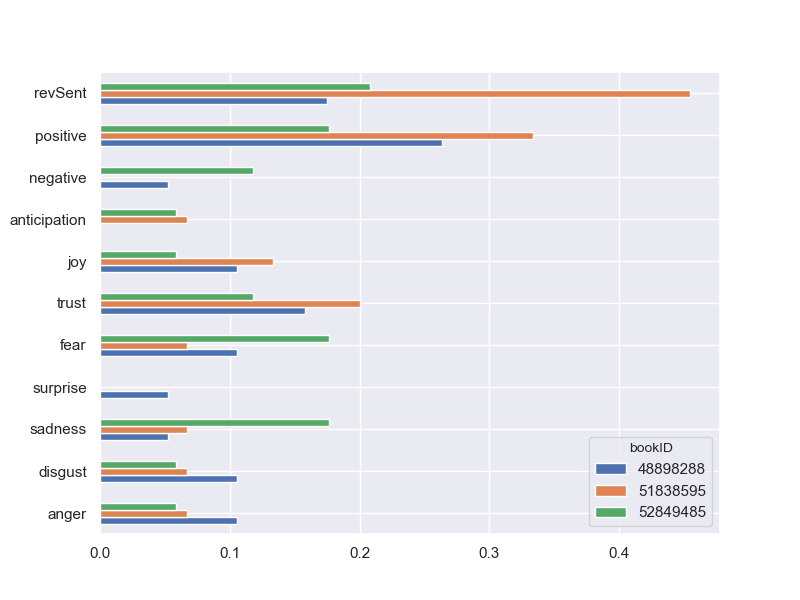

In [8]:
# User 1:
getUserEmo('104349942', 'Miss')

             anger   disgust   sadness  surprise      fear     trust  \
bookID                                                                 
49294981  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
49977690  0.090909  0.181818  0.090909  0.000000  0.090909  0.181818   
50286858  0.000000  0.000000  0.052632  0.105263  0.052632  0.157895   
50703993  0.000000  0.000000  0.000000  0.000000  0.076923  0.153846   

               joy  anticipation  negative  positive   revSent  
bookID                                                          
49294981  0.000000      0.333333  0.166667  0.500000 -0.171528  
49977690  0.000000      0.000000  0.181818  0.181818  0.186195  
50286858  0.210526      0.157895  0.052632  0.210526  0.419048  
50703993  0.153846      0.153846  0.230769  0.230769  0.238095  
Amanda 30 DAYS IN JUNE
Amanda Family For Beginners
Amanda The Spitfire Girl: Over and Out
Amanda Summer in Provence


<IPython.core.display.Javascript object>


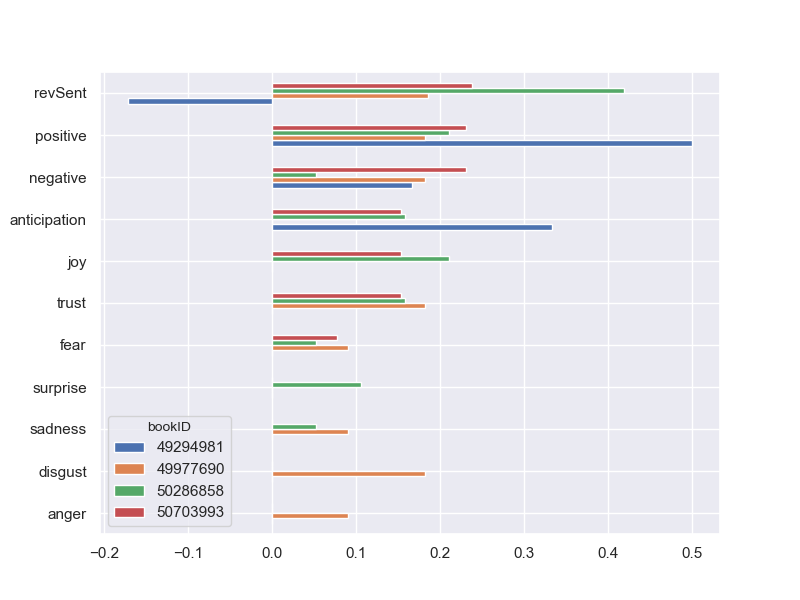

In [9]:
# User 2:
getUserEmo('11072350', 'Amanda')

             anger   disgust   sadness  surprise      fear     trust  \
bookID                                                                 
17571907  0.052632  0.052632  0.105263  0.052632  0.052632  0.105263   

               joy  anticipation  negative  positive   revSent  
bookID                                                          
17571907  0.052632      0.157895  0.105263  0.263158 -0.222778  
Erika Bellman & Black


<IPython.core.display.Javascript object>


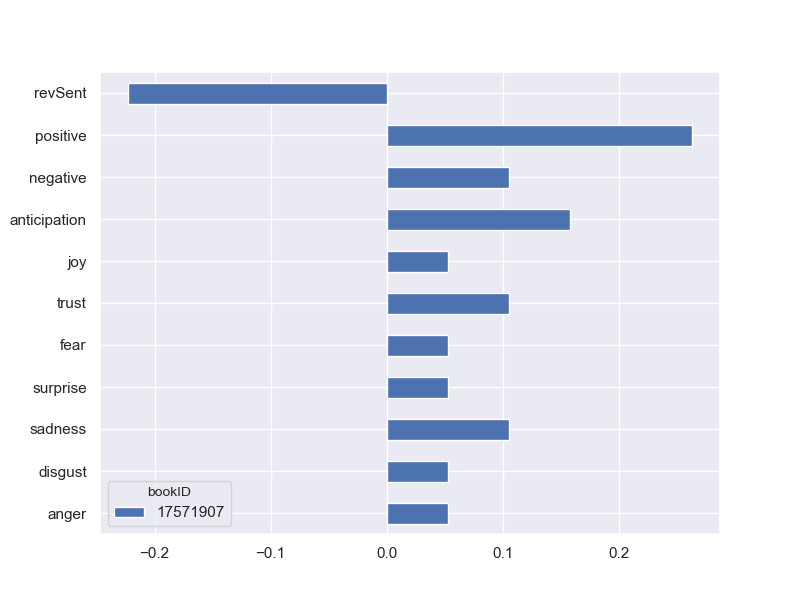

In [12]:
# User 3
getUserEmo('803748', 'Erika')

## Study of the $\alpha$ value to skip deceiving reviews

In [13]:
#Mask 1 for texts with nagative sentiment 
maskRevs1 = revsMetaDF['revSent']< 0
revsMetaDF.loc[maskRevs1]

,_id,userID,bookID,revSent,revSubj,anger,anticipation,disgust,fear,joy,negative,positive,sadness,surprise,trust
11123,4000000004,10000002,10000004,-0.046429,0.508333,0.000000,0.238095,0.000000,0.047619,0.095238,0.095238,0.285714,0.000000,0.047619,0.190476
11124,4000000005,10000003,10000005,-0.080952,0.614286,0.050000,0.100000,0.050000,0.100000,0.050000,0.200000,0.150000,0.000000,0.150000,0.150000
11126,4000000007,10000003,10000007,-0.076667,0.673333,0.000000,0.100000,0.000000,0.100000,0.100000,0.200000,0.400000,0.000000,0.000000,0.100000
11128,4000000009,10000003,10000009,-0.083333,0.705556,0.000000,0.000000,0.250000,0.000000,0.000000,0.250000,0.250000,0.250000,0.000000,0.000000
11130,4000000011,10000005,10000011,-0.008750,0.510000,0.066667,0.133333,0.066667,0.133333,0.066667,0.133333,0.133333,0.133333,0.000000,0.133333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4825,3257775090,9964343,761844,-0.081250,0.494444,0.058824,0.117647,0.058824,0.058824,0.058824,0.117647,0.176471,0.117647,0.058824,0.176471
3235,3255652493,99765542,39148880,-0.125000,0.375000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2611,3254659410,99818416,20170404,-0.105000,0.305000,0.166667,0.000000,0.166667,0.222222,0.000000,0.333333,0.000000,0.111111,0.000000,0.000000
2603,3254660722,99818416,36348525,-0.250000,0.250000,0.142857,0.142857,0.000000,0.000000,0.000000,0.428571,0.000000,0.285714,0.000000,0.000000


In [16]:
#Mask 2 for texts witn more positive words than negative words
maskRevs2 = revsMetaDF['positive']-revsMetaDF['negative'] > 0
revsMetaDF[maskRevs2]

,_id,userID,bookID,revSent,revSubj,anger,anticipation,disgust,fear,joy,negative,positive,sadness,surprise,trust
1802,3254063006,100011184,52239792,0.633333,0.833333,0.000000,0.125000,0.000000,0.000000,0.250000,0.125000,0.375000,0.000000,0.000000,0.125000
6248,3261398749,100048192,51832696,0.302381,0.554762,0.062500,0.062500,0.062500,0.125000,0.125000,0.125000,0.187500,0.125000,0.000000,0.125000
6715,3262251352,10009242,41681087,0.375000,0.800000,0.000000,0.000000,0.000000,0.000000,0.428571,0.000000,0.428571,0.000000,0.142857,0.000000
1173,3253064317,1002421,25776235,0.500000,1.000000,0.000000,0.000000,0.000000,0.000000,0.250000,0.000000,0.500000,0.000000,0.250000,0.000000
3925,3256380864,100248819,26192646,0.292045,0.569318,0.000000,0.000000,0.000000,0.000000,0.250000,0.000000,0.500000,0.000000,0.000000,0.250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1234,3253110032,99928990,39792427,0.420833,0.700000,0.000000,0.166667,0.000000,0.000000,0.166667,0.000000,0.500000,0.000000,0.000000,0.166667
1979,3254163215,99951758,13578959,0.875000,0.600000,0.000000,0.200000,0.000000,0.000000,0.200000,0.000000,0.200000,0.000000,0.200000,0.200000
5761,3259454161,9996806,45231829,0.362500,0.729167,0.071429,0.000000,0.071429,0.071429,0.214286,0.142857,0.285714,0.000000,0.000000,0.142857
9272,3265829737,99975384,52871144,0.250000,0.300000,0.000000,0.000000,0.000000,0.000000,0.500000,0.000000,0.500000,0.000000,0.000000,0.000000


In [17]:
#Exclude revisions for a give alpha value
def exclude(DF, alpha):
    #mask 3 for texts with (negative words - positive words)/(alpha*sent)
    maskRevs3 = (DF['positive']- DF['negative'])/(alpha * -DF['revSent']) < 1 
    return DF.loc[maskRevs1 & maskRevs2 & maskRevs3].count()[0]

<IPython.core.display.Javascript object>


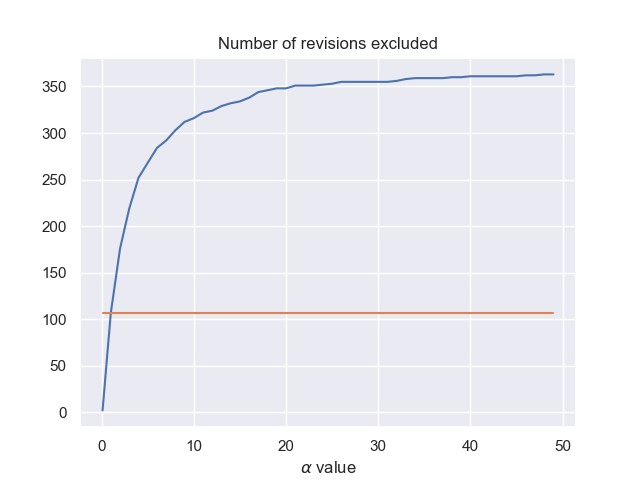

In [18]:
#Number of exlcluded texts for eac aalpha value 
values= [0.1, 0.3, 0.5] + [num for num in range(1, 50)]
lista = [ exclude (revsMetaDF, a) for a in values ]
alphaRevDF = pd.DataFrame(lista)
alphaRevDF['Unos'] = [ exclude(revsMetaDF, 1) for value in values]
alphaRevDF.index = values
alphaRevDF.index.name = r'$\alpha$ value'
alphaRevDF.columns =['Revisions', 'Unos']
alphaRevDF.plot(title = 'Number of revisions excluded', legend = False)

In [19]:
maskBooks1 = booksMetaDF['descrSent'] < 0
booksMetaDF.loc[maskBooks1]

,_id,descrSent,descrSubj,anger,anticipation,disgust,fear,joy,negative,positive,sadness,surprise,trust
924,1001506,-0.125000,0.375000,0.066667,0.066667,0.066667,0.066667,0.133333,0.066667,0.200000,0.066667,0.066667,0.200000
3340,10097498,-0.131944,0.738194,0.060000,0.120000,0.040000,0.140000,0.080000,0.220000,0.140000,0.100000,0.020000,0.080000
3237,1025250,-0.075000,0.066667,0.040000,0.200000,0.000000,0.080000,0.000000,0.080000,0.240000,0.040000,0.000000,0.320000
647,1034516,-0.072727,0.536364,0.078431,0.137255,0.019608,0.137255,0.058824,0.117647,0.156863,0.039216,0.098039,0.156863
372,104191,-0.100000,0.508333,0.058824,0.117647,0.000000,0.147059,0.058824,0.176471,0.147059,0.117647,0.000000,0.176471
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5973,9665836,-0.125000,0.375000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7544,9736930,-0.109091,0.557792,0.058824,0.058824,0.058824,0.117647,0.000000,0.176471,0.235294,0.117647,0.058824,0.117647
3837,98427,-0.087500,0.604167,0.066667,0.044444,0.044444,0.133333,0.088889,0.155556,0.222222,0.066667,0.022222,0.155556
3342,9866508,-0.117149,0.525413,0.044118,0.102941,0.029412,0.132353,0.073529,0.117647,0.161765,0.102941,0.044118,0.191176


In [20]:
maskBooks2 = booksMetaDF['positive']-booksMetaDF['negative'] > 0
booksMetaDF[maskBooks2]

,_id,descrSent,descrSubj,anger,anticipation,disgust,fear,joy,negative,positive,sadness,surprise,trust
924,1001506,-0.125000,0.375000,0.066667,0.066667,0.066667,0.066667,0.133333,0.066667,0.200000,0.066667,0.066667,0.200000
5277,1003759,0.218750,0.631250,0.000000,0.111111,0.055556,0.055556,0.166667,0.111111,0.277778,0.000000,0.055556,0.166667
5286,1003761,0.218750,0.631250,0.000000,0.111111,0.055556,0.055556,0.166667,0.111111,0.277778,0.000000,0.055556,0.166667
7435,1003985,0.104278,0.435829,0.109375,0.062500,0.046875,0.140625,0.046875,0.140625,0.187500,0.125000,0.062500,0.078125
557,10054335,0.034470,0.421248,0.000000,0.108108,0.000000,0.027027,0.108108,0.054054,0.378378,0.081081,0.108108,0.135135
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7964,9875107,0.163690,0.637202,0.023810,0.095238,0.047619,0.095238,0.119048,0.142857,0.214286,0.095238,0.071429,0.095238
5359,9876475,0.237500,0.379167,0.000000,0.166667,0.000000,0.083333,0.166667,0.083333,0.250000,0.083333,0.000000,0.166667
2211,9908518,0.048912,0.469212,0.145833,0.083333,0.104167,0.145833,0.062500,0.145833,0.166667,0.020833,0.062500,0.062500
764,9912994,0.420000,0.510000,0.080000,0.040000,0.080000,0.080000,0.120000,0.080000,0.240000,0.120000,0.040000,0.120000


In [21]:
a = 1
maskBooks3 = (booksMetaDF['positive']-booksMetaDF['negative'])/ (a * -booksMetaDF['descrSent']) < 1
booksMetaDF.loc[maskBooks1 & maskBooks2 & maskBooks3].count()[0]

214